In [ ]:
'''
SYARAT
--> Untuk width = 5, nilai hasil smoothing pada indeks n adalah
    rata-rata dari x[n-2], x[n-1], x[n], x[n+1], x[n+2]
--> Secara umum: smoothed[n] = mean(x[n-k : n+k+1]) dimana k = (width-1)//2
--> Jika width genap, TIDAK ubah menjadi ganjil
--> Gunakan asymmetric window yang condong ke depan. Contoh:
    untuk width = 4, gunakan window [n-1, n, n+1, n+2]
--> Untuk posisi di dekat awal/akhir array, gunakan window yang
    tersedia. Contoh: untuk width = 5 di n = 0,
    gunakan mean(x[0:3])
--> Pastikan panjang output sama dengan input
--> Data yang digunakan:
    a. Generate x = 200 titik merata dari 0 sampai 100
    b. Hitung f(x) = x2
    c. Tambahkan noise: y_noisy = x2 + randn
    d. Gunakan np.random.seed(42) untuk hasil yang reproducible
--> Output yang diharapkan:
    a. Titik-titik data noisy (scatter plot)
    b. Garis fungsi asli f(x) = x2
    c. Garis hasil smoothing dengan beberapa window size (contoh:
    3, 5, 7, 10)
    d. Legenda, judul, dan label sumbu
''' 

In [ ]:
#Setup
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
x = np.linspace(0,100,201)
noise = np.rand
def f(x):
    return x**2
def f_noise(x):
    np.random.seed(42)
    return f(x)+ np.random.randn(1)
def moving_average_filter(width):
    panjang = len(x)
    list_y_new = []
    for i in range(panjang):
        if width%2 == 1: #--> Ganjil
            k = (width-1)//2
            start = i-k
            end = i+k+1
            xi = np.arrange(start,end)
            y_new = np.mean(f(xi)) #--> Hitung rata rata f(x) dalam rentang width
            list_y_new.append(y_new)

In [ ]:
import numpy as np

def moving_average(x, width):
    x = np.asarray(x)
    N = len(x)
    smoothed = np.zeros(N)

    for n in range(N):
        if width % 2 == 1:
            # width ganjil (simetris)
            k = (width - 1) // 2
            start = n - k
            end = n + k + 1
        else:
            # width genap (asimetris, condong ke depan)
            back = width // 2 - 1
            front = width // 2
            start = n - back
            end = n + front + 1

        # handle edge
        start = max(start, 0)
        end = min(end, N)

        smoothed[n] = np.mean(x[start:end])

    return smoothed


In [2]:
np.random.seed(42)

x = np.linspace(0, 100, 200)
y_true = x**2
y_noisy = y_true + np.random.randn(len(x))

y_smooth_5 = moving_average(y_noisy, 5)
y_smooth_10 = moving_average(y_noisy, 10)


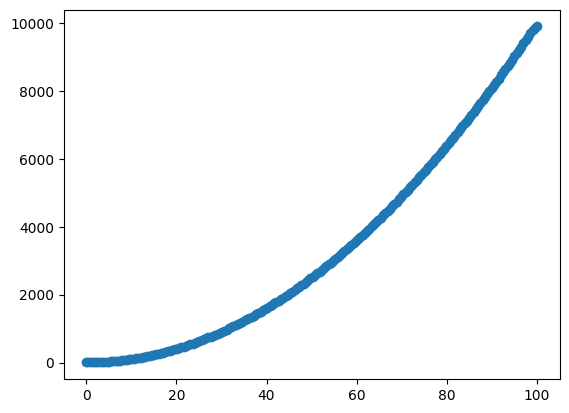

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y_smooth_5)